# **LINEAR REGRESSION FROM SCRATCH**
# Machine learning
        - Prof Jibrael Jos
# **Name:** Shubham Kumar
# **RegNo:** 23122033
# **Class:** MSC DS A

### Importing required libraries

In [2]:
# import python modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import time

# AIM

I will try to implement **Linear Regression** for prediction without using to Python's scikit-learn library.

# Linear Regression

Linear regression analysis is used to predict the value of a variable based on the value of another variable. The variable you want to predict is called the dependent variable. The variable you are using to predict the other variable's value is called the independent variable.

![alt text](images/lR_rep.png)

Where

- **Y** is the dependent/outcome/response variable
- **β0** is the Y intercept
- **β1** is the slope intercept

In [3]:
# Lets implement this using python
def linear(X, b0, b1):
    return [b0+b1*x for x in X]

## WHAT IS OLS?
OLS gives the maximum likelihood estimate for β when the parameters have equal variance and are uncorrelated, and the noise ε is white, uncorrelated and follows a Gaussian distribution.
![alt text](images/ols.png)

Where: 
- Ȳ is the mean of the dependent variable
- β is the slope intercept
- x̄ is the mean of dependent variable 


In order to make this easy we will calculate the numerator and denominator seprately <br>
β1 = Σnume/Σdenom

Lets implement this by python code.

In [4]:
# Lets Calculate β0 - intercept
def intercept(X, Y, β1): 
    x̄ = np.mean(X)
    Ȳ = np.mean(Y)
    
    return Ȳ-β1*x̄

In [5]:
# Lets Calculate β1 - slope
def slope(X, Y):
    x̄ = np.mean(X)
    Ȳ = np.mean(Y)
    
    nume = sum([(x-x̄) * (y-Ȳ) for x,y in zip(X,Y)])
    denom = sum([(x-x̄)**2 for x,y in zip(X,Y)])
    
    return nume / denom

# LETS START WORKING ON OUR DATASET

In [6]:
data = pd.read_csv("dataset/Automobile_data.csv")
data.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,0,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,0,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


# Exploratory Data Analysis

In [7]:
print("Dataset size")
# here we have simply used print formating {} takes the values passed after "" subsequesntly 
print("Rows {} columns {}" . format(data.shape[0], data.shape[1]))

Dataset size
Rows 205 columns 26


In [8]:
# we can simply use .shape =, it will give rowsXcolumns
data.shape

(205, 26)

In [9]:
data.dtypes

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
price                  int64
dtype: object

We can see there are lots of columns, but for linear regression we need TWO variables that we have defined above.

Now we will select **price** as **dependeant variable** and we choose **independent variable** based on higher correlation

**price** data type is **object**, we have to change it to either int/float. And it also contain **?**. So we have to remove the rows.

In [10]:
# We will drop some unwanted columns
unwanted_columns = ['make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'engine-type', 'num-of-cylinders', 'fuel-system']
data = data.drop(columns=unwanted_columns)

In [11]:
data = data.loc[data['price']!='?']
data[['price']] = data[['price']].astype(int)

For selecting our independent variable, we will select The most correlated variable to **price**.

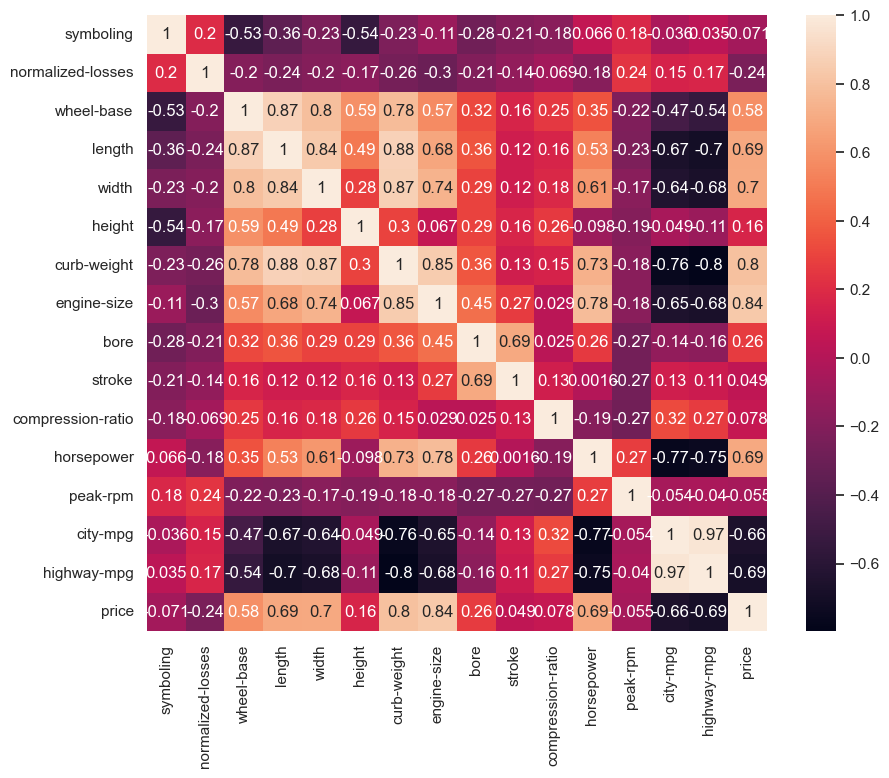

In [12]:
# Plotting the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True)
plt.show()

#### **engine-size** has the highest correlation with **price** let us use that column.

In [13]:
final_data = data[['engine-size', 'price']]
predictor = data['engine-size']
target = data['price']

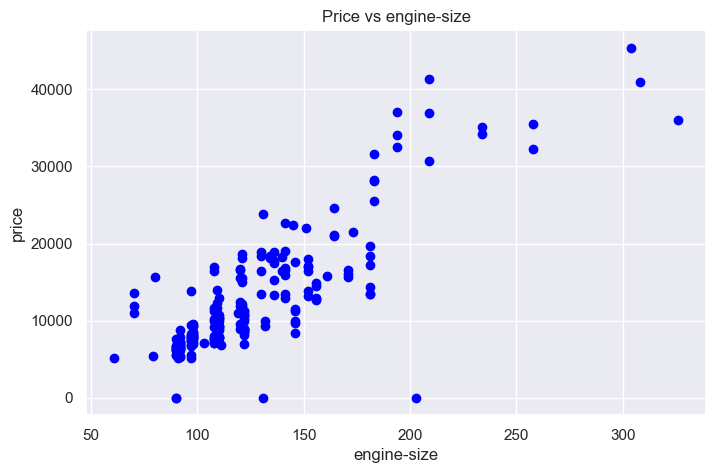

In [14]:
plt.figure(figsize=(8,5))
plt.title("Price vs engine-size")
plt.scatter(predictor, target, color = "blue")
plt.xlabel('engine-size')
plt.ylabel('price')
plt.show()

Above is our data points. We will now fit our linear regression line in those data points

# PREDICTION

In [15]:
b1 = slope(predictor, target)
b0 = intercept(predictor, target, b1)
predicted = linear(predictor, b0, b1)
predicted

[13452.29374129662,
 13452.29374129662,
 17029.452689636906,
 10037.7329269718,
 14427.882545389424,
 14427.882545389424,
 14427.882545389424,
 14427.882545389424,
 13614.891875312085,
 13614.891875312085,
 9875.13479295633,
 9875.13479295633,
 18980.630297822518,
 18980.630297822518,
 18980.630297822518,
 26297.54632851856,
 26297.54632851856,
 26297.54632851856,
 2233.0224942293535,
 6948.368380677914,
 6948.368380677914,
 6948.368380677914,
 6948.368380677914,
 8249.153452801655,
 6948.368380677914,
 6948.368380677914,
 6948.368380677914,
 8249.153452801655,
 12151.50866917288,
 17679.845225698777,
 7273.564648708849,
 7273.564648708849,
 5159.788906507769,
 7273.564648708849,
 7273.564648708849,
 7273.564648708849,
 7273.564648708849,
 10200.331060987264,
 10200.331060987264,
 10200.331060987264,
 10200.331060987264,
 10200.331060987264,
 10200.331060987264,
 10362.929195002733,
 6948.368380677914,
 6948.368380677914,
 11663.714267126474,
 34264.854895276476,
 34264.854895276476,
 

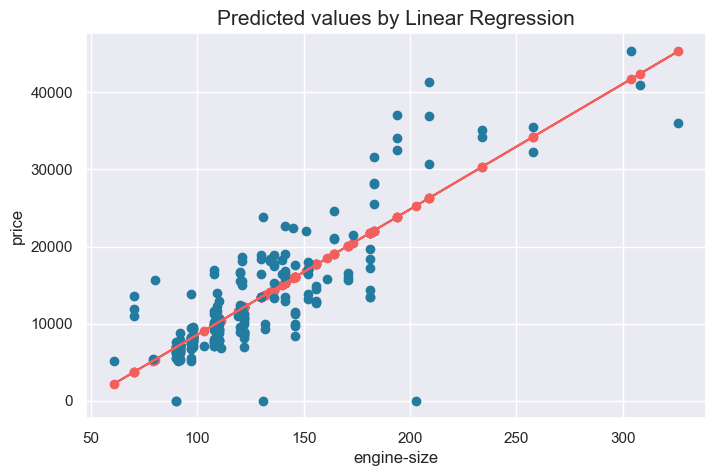

In [16]:
plt.figure(figsize = (8, 5))
plt.plot(predictor, predicted, color = '#f25f5c')
plt.scatter(predictor, predicted, color = '#f25f5c')
plt.title('Predicted values by Linear Regression', fontsize = 15)
plt.xlabel('engine-size')
plt.ylabel('price')
plt.scatter(predictor, target, color = "#247ba0")
plt.show()

In [17]:
print("Coefficients:\n=============")
print("b0 : ", b0)
print("b1 : ", b1)

Coefficients:
b0 :  -7685.463680714172
b1 :  162.59813401546762


The red line above is our predicted values, it is the "line that best fits the data". Our linear regression prediction is done the next thing we're going to do is to evaluate how well does this regression line fits our data.

# Evalution

In simple linear regression, the evaluation technique typically involves assessing how well the regression line fits the observed data points. Here are the ways in evaluating the performance of a simple linear regression model:
- Coefficient of Determination (R-squared)
- Mean Squared Error (MSE)

We are going to use Coefficient of Determination (R-squared)

**Coefficient of Determination (R-squared):**<br> 
Calculate the coefficient of determination (R-squared), which represents the proportion of variance in the dependent variable that is explained by the independent variable(s). It ranges from 0 to 1, where 1 indicates a perfect fit. R-squared helps assess the goodness-of-fit of the regression model.

In our case, by "data" we mean our independent variable data, the engine-size data. Usually, the larger the  R2
value is, the better the model fits the data.

![alt text](images/r-square.png)

where
- **SS**regression "regression sum of squares"; quantifies how far the predicted value is from the mean
- **SS**error "error sum of squares"; quantifies the variance of the target data points around the regression line
- **SS**total "total sum of squares"; quantifies the variance of the target data points around the mean

![alt text](images/r-sq2.png)

In [18]:
def r_squared(Y, ŷ):
    ssr, sse, r_sqr = [0]*3
    Ȳ = np.mean(Y)
    # ssr = sum([(ŷ - Ȳ)**2 for y_hat in Y_HAT])
    sse = sum([(y - ŷ)**2 for y,ŷ in zip(Y, ŷ)])
    sst = sum([(y - Ȳ)**2 for y in Y])
    
    r_sqr = 1 - (sse / sst)
    
    return r_sqr

In [19]:
r_squared(target, predicted)

0.7024070605300834

In [26]:
def mean_squared_error(y, ŷ):
    n = len(y)
    mse = sum((y - ŷ) ** 2) / n
    return mse

# Calculate Mean Squared Error
mse = mean_squared_error(target, predicted)
print("Mean Squared Error:", mse)

rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)


Mean Squared Error: 19329418.956966817
Root Mean Squared Error: 4396.523508064845


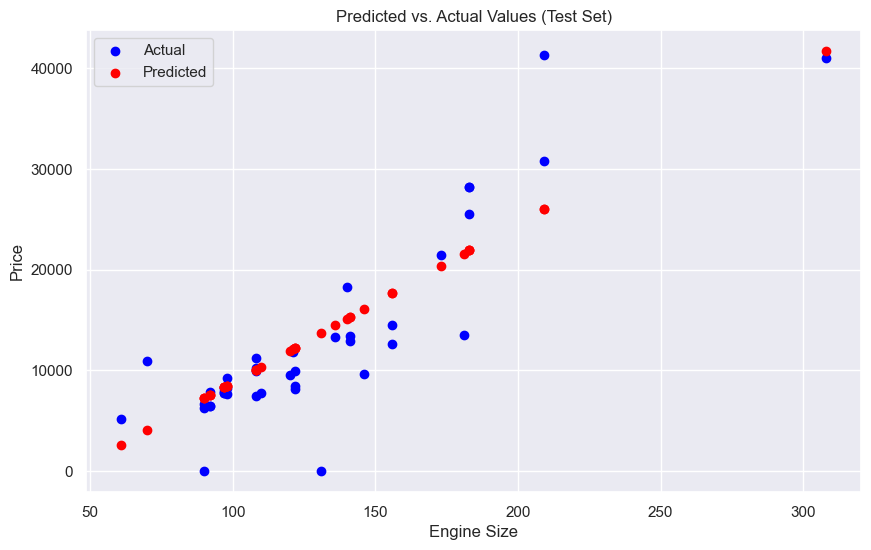

Training Set:
RMSE: 4349.690365234667
R^2: 0.6824579254259783
MAE: 3005.951992684574

Testing Set:
RMSE: 4604.602200863046
R^2: 0.7546553940742735
MAE: 3085.075618392609


In [28]:
# Calculate metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)

train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Visualize predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', label='Actual')
plt.scatter(X_test, y_pred_test, color='red', label='Predicted')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.title('Predicted vs. Actual Values (Test Set)')
plt.legend()
plt.show()

# Print metrics
print("Training Set:")
print("RMSE:", train_rmse)
print("R^2:", train_r2)
print("MAE:", train_mae)

print("\nTesting Set:")
print("RMSE:", test_rmse)
print("R^2:", test_r2)
print("MAE:", test_mae)


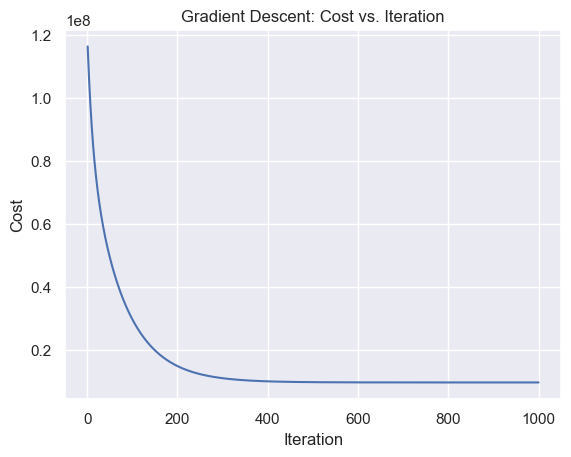

Intercept: 10777.201751718769
Coefficient: 8347.984580624847


In [32]:
# Normalize features
X = (X - X.mean()) / X.std()
X = np.c_[np.ones(X.shape[0]), X]  # Add a column of ones for the intercept term

# Hyperparameters
learning_rate = 0.01
num_iterations = 1000

# Initialize parameters
theta = np.zeros(X.shape[1])

# Gradient Descent
cost_history = []

for i in range(num_iterations):
    # Calculate predictions
    predictions = np.dot(X, theta)
    
    # Calculate error
    error = predictions - y
    
    # Calculate cost (mean squared error)
    cost = np.sum(error ** 2) / (2 * len(X))
    cost_history.append(cost)
    
    # Calculate gradients
    gradients = np.dot(X.T, error) / len(X)
    
    # Update parameters
    theta -= learning_rate * gradients

# Plotting the cost history
plt.plot(range(1, num_iterations + 1), cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Gradient Descent: Cost vs. Iteration')
plt.show()

# Final parameters
print("Intercept:", theta[0])
print("Coefficient:", theta[1])

In [33]:
# Define a function to make predictions
def predict_price(engine_size, intercept, coefficient):
    return intercept + coefficient * engine_size

# Example: Predict price for a new engine size of 200
new_engine_size = 200
predicted_price = predict_price(new_engine_size, theta[0], theta[1])
print("Predicted Price for Engine Size {}: ${:.2f}".format(new_engine_size, predicted_price))


Predicted Price for Engine Size 200: $1680374.12


In [34]:
# Calculate R-squared before gradient descent
r2_before = r_squared(y, predicted)

# Calculate predictions after gradient descent
predicted_after = np.dot(X, theta)

# Calculate R-squared after gradient descent
r2_after = r_squared(y, predicted_after)

print("R-squared before gradient descent:", r2_before)
print("R-squared after gradient descent:", r2_after)


R-squared before gradient descent: 0.7024070605300834
R-squared after gradient descent: 0.7024038571790983


#### For comparison, I will implement linear regression using python's scikit-learn library and the we will compare the r-square value of both **scikit-learn** and **scratch** method.

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

reg = LinearRegression()
predictor = np.array(predictor).reshape((-1, 1))
reg = reg.fit(predictor, target)

Y_pred = reg.predict(predictor)
r2_score = reg.score(predictor, target)
print(r2_score)

0.7024070605300833


# Observation

We got same value of **R²** for our model from scratch and of scikit_learn 

# Summary and Conclusion

In this kernel, I've created the simplest Linear Regression model from scratch, using Python. I have gone through mathematics working behind the model. Using one predictor variable and target variable we've implemented our Linear Regression model in a simple analytics use case, that is predicting the price of a car based on it's engine size. Evaluation of our model shows that our linear regression performs exactly the same as sklearn's Linear Regression model.

However, I conclude that my model from scratch is close to **useless** and it is no way near to python **scikit-learn library**.

Cheers😁😁

# Reference 
- Dataset - https://www.kaggle.com/datasets/toramky/automobile-dataset
- AndrewNg for mathematical concepts 
- chatgpt for bits of error :/